## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

Corresponding with this notebook is a slide deck where you will need to update all the portions in red.  Completing the notebook will provide all the results needed for the slides.  **Correctly completing the slides is a required part of the project.**

## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Probability](#probability)
- [Part III - Experimentation](#experimentation)
- [Part IV - Algorithms](#algorithms)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='descriptive'></a>
#### Part I - Descriptive Statistics

To get started, let's import our libraries.

In [126]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
# Read the data into a DataFrame
df = pd.read_csv('ab_data.csv')
df.head()

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0


In [128]:
# Get the total number of rows (observations) in the dataset
df.shape[0]

69889

In [129]:
# Calculate the overall conversion rate (proportion of users who converted)
df['converted'].mean()

np.float64(0.13047832992316388)

In [130]:
# Check for missing values in each column of the DataFrame
df.isna().sum()

country      0
group        0
converted    0
dtype: int64

In [131]:
# Count the number of visitors from each country
df['country'].value_counts()

country
US    48850
UK    17551
CA     3488
Name: count, dtype: int64

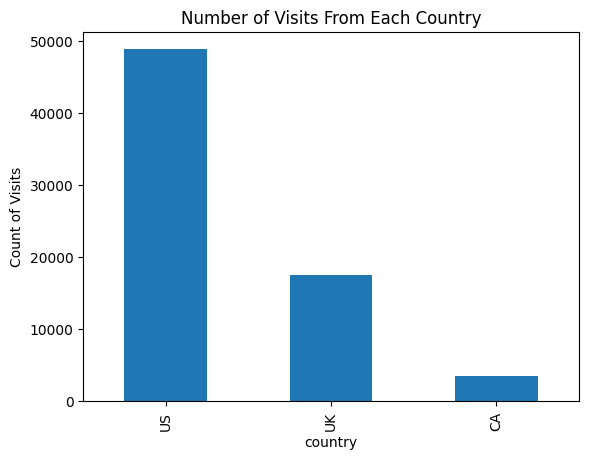

In [132]:
# Plot a bar chart showing the number of visits from each country
df['country'].value_counts().plot(kind='bar');
plt.title('Number of Visits From Each Country');
plt.ylabel('Count of Visits');
plt.show();

In [133]:
# Display information about DataFrame columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69889 entries, 0 to 69888
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    69889 non-null  object
 1   group      69889 non-null  object
 2   converted  69889 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [134]:
# Show the count of each unique value in the 'converted' column (0 = not converted, 1 = converted)
df['converted'].value_counts()

converted
0    60770
1     9119
Name: count, dtype: int64

<a id='probability'></a>
#### Part II - Probability

`1.` Now that you have had a chance to learn more about the dataset, let's look more at how different factors are related to `converting`.

In [135]:
# Calculate the probability of conversion for any individual in the dataset
df['converted'].mean()

np.float64(0.13047832992316388)

`b)` Given that an individual was in the `control` group, what is the probability they converted?

In [136]:
# Calculate the probability of conversion for individuals in the control group
df.query('group == "control"')['converted'].mean()

np.float64(0.1052540515600669)

`c)` Given that an individual was in the `treatment` group, what is the probability they converted?

In [137]:
# Calculate the probability of conversion for individuals in the treatment group
df.query("group=='treatment'")['converted'].mean()

np.float64(0.15532078043793132)

`d)` Do you see evidence that the treatment is related to higher `converted` rates?

**yes, the treatment group has a higher conversion rate than the control group. The control group has a conversion rate of 10.5% and the treatment group has a conversion rate of 15.5%**

`e)` What is the probability that an individual was in the `treatment`?

In [138]:
# Calculate the probability that an individual was assigned to the treatment group
df[df['group'] == 'treatment'].shape[0] / df.shape[0]
# chance of being in treatment group

0.5038131894861853

`f)` What is the probability that an individual was from Canada `CA`?

In [139]:
# Calculate the probability that an individual is from Canada (CA)
df[df['country'] == 'CA'].shape[0] / df.shape[0]
# chance of being in CA

0.04990771079855199

`g)` Given that an individual was in the `US`, what was the probability that they `converted`?

$P(\text{converted} == 1|\text{country} ==\text{"US"})$



In [140]:
# Calculate the probability that a visitor from the US converted
df.query('country == "US"')['converted'].mean()

np.float64(0.13277379733879222)

`h)` Given that an individual was in the `UK`, what was the probability that they `converted`? 

$P(\text{converted} == 1|\text{country} ==\text{"UK"})$

In [141]:
# Calculate the probability that a visitor from the UK converted
df.query('country == "UK"')['converted'].mean()

np.float64(0.12512107572218106)

In [142]:
# Calculate the probability that a visitor from CA converted
df.query('country == "CA"')['converted'].mean()

np.float64(0.1252866972477064)

`i)` Do you see evidence that the `converted` rate might differ from one country to the next?

**yes, the conversion rates are different from one country to another**

`j)` Consider the table below, fill in the conversion rates below to look at how conversion by country and treatment group vary.  The `US` column is done for you, and two methods for calculating the probabilities are shown - **COMPLETE THE REST OF THE TABLE**.  Does it appear that there could be an interaction between how country and treatment impact conversion?

These two values that are filled in can be written as:

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"control"})) = 10.7\%$

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"treatment"})) = 15.8\%$

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  %          |  %          |
| Treatment   | 15.8%       |  %          |  %          |

In [143]:
# Calculate conversion rate for US control group
print(df.query('country == "US" and group == "control" and converted == 1').shape[0]/df.query('country == "US" and group == "control"').shape[0]) 
# Calculate conversion rate for US treatment group
print(df.query('country == "US" and group == "treatment" and converted == 1').shape[0]/df.query('country == "US" and group == "treatment"').shape[0])

0.10731404958677686
0.1577687626774848


In [144]:
# Use groupby to quickly calculate conversion rates for US by group (control/treatment)
df.query('country == "US"').groupby('group')['converted'].mean() *100

group
control      10.731405
treatment    15.776876
Name: converted, dtype: float64

##### Solution -- Complete the Table Here

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  %          |  %          |
| Treatment   | 15.8%       |  %          |  %          |

In [145]:
# Calculate conversion rates for UK by group (control/treatment), multiply by 100 for percentage
df.query('country == "UK"').groupby('group')['converted'].mean() *100

group
control      10.164866
treatment    14.869804
Name: converted, dtype: float64

In [146]:
# Calculate conversion rates for CA by group (control/treatment)
df.query('country == "CA"').groupby('group')['converted'].mean()

group
control      0.094474
treatment    0.154017
Name: converted, dtype: float64

In [147]:
# Calculate and format conversion rates by country and group as percentages
# Round to 1 decimal, convert to string, add '%', unstack for table format, and transpose for display
((df.groupby(['country','group'])['converted'].mean() * 100).round(1).astype(str)+"%").unstack().T

country,CA,UK,US
group,,,
control,9.4%,10.2%,10.7%
treatment,15.4%,14.9%,15.8%


##### Solution -- Complete the Table Here

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  10.2%      |  9.4%       |
| Treatment   | 15.8%       |  14.9%      |  15.4%      |

<a id='experimentation'></a>
### Part III - Experimentation

`1.` Consider you need to make the decision just based on all the data provided.  If you want to assume that the control page is better unless the treatment page proves to be definitely better at a Type I error rate of 5%, you state your null and alternative hypotheses in terms of **$p_{control}$** and **$p_{treatment}$** as:  

$H_{0}: p_{control} >= p_{treatment}$

$H_{1}: p_{control} < p_{treatment}$

Which is equivalent to:

$H_{0}: p_{treatment} - p_{control} <= 0$

$H_{1}: p_{treatment} - p_{control} > 0$


Where  
* **$p_{control}$** is the `converted` rate for the control page
* **$p_{treatment}$** `converted` rate for the treatment page

**Note for this experiment we are not looking at differences associated with country.**

Assume under the null hypothesis, $p_{treatment}$ and $p_{control}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{treatment}$ and $p_{control}$ are equal. Furthermore, assume they are equal to the **converted** rate in `df` regardless of the page. **These are set in the first cell below.**<br><br>

* Use a sample size for each page equal to the ones in `df`. **These are also set below.**  <br><br>

* Perform the sampling distribution for the difference in `converted` between the two pages over 500 iterations of calculating an estimate from the null.  <br><br>

* Use the cells below to provide the necessary parts of this simulation.  

If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 4** in the classroom to make sure you are on the right track.<br><br>

In [148]:
# Set the conversion rate under the null hypothesis (same for both groups)
p_control_treatment_null  = df['converted'].mean()
# Get the sample size for the treatment group
n_treatment = df.query('group == "treatment"').shape[0]
# Get the sample size for the control group
n_control = df.query('group == "control"').shape[0]

In [149]:
# Extract the converted column for the treatment group
treatment_converted = df.query('group == "treatment"').converted
print(treatment_converted)

1        1
2        0
4        0
5        0
6        0
        ..
69880    0
69883    0
69884    0
69886    0
69888    0
Name: converted, Length: 35211, dtype: int64


In [150]:
# Extract the converted column for the control group
control_converted = df.query('group == "control"').converted
print(control_converted)

0        0
3        0
15       0
16       0
18       1
        ..
69879    0
69881    1
69882    0
69885    0
69887    0
Name: converted, Length: 34678, dtype: int64


`d)` Find the estimate for $p_{treatment}$ - $p_{control}$ under the null using the simulated values from part `(b)` and `(c)`.

In [151]:
# Calculate the observed difference in conversion rates between treatment and control groups
obs_diff = treatment_converted.mean() - control_converted.mean()
obs_diff

np.float64(0.050066728877864425)

In [152]:
# Simulate the sampling distribution of the difference in conversion rates under the null hypothesis
p_diffs = []

for _ in range(1000):
    # Simulate conversions for control group under the null
    control_chance = np.random.binomial(1, p_control_treatment_null, n_control)
    # Simulate conversions for treatment group under the null
    treatment_chance = np.random.binomial(1, p_control_treatment_null, n_treatment)
    # Calculate mean conversion rates for both groups
    p_treatment = treatment_chance.mean()
    p_control = control_chance.mean()
    # Calculate the difference in conversion rates
    diff = p_treatment - p_control
    # Append the difference to the list
    p_diffs.append(diff)

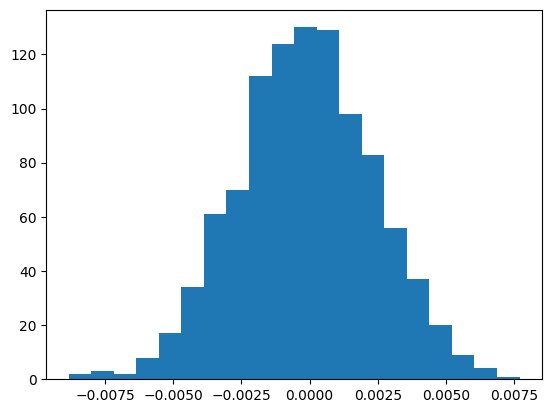

In [153]:
# Plot a histogram of the simulated differences in conversion rates (p_diffs)
plt.hist(p_diffs, bins=20);

In [154]:
# Calculate the proportion of simulated differences greater than the observed difference (p-value)
(p_diffs> obs_diff).mean()

np.float64(0.0)

**The actual value of (treatment - control) is impossible to happen in a normal distribution so the p value is 0 so we have to reject the null**

<a id='algorithms'></a>
#### Part IV - Algorithms

**Logistic**

In [155]:
# Add an intercept column for regression analysis
# Create a dummy variable 'ab_page' and take the treatment group
df['intercept'] = 1
df['ab_page'] = pd.get_dummies(df['group'])['treatment']
df.head()

,country,group,converted,intercept,ab_page
0,UK,control,0,1,False
1,US,treatment,1,1,True
2,UK,treatment,0,1,True
3,UK,control,0,1,False
4,UK,treatment,0,1,True


In [156]:
# Define the features (X) and target variable (y) for regression
X = df[['intercept', 'ab_page']].astype(float)
y = df['converted']

In [157]:
import statsmodels.api as sm

# Fit a logistic regression model to predict conversion based on page type
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.384516
         Iterations 6


In [158]:
# Display the summary of the logistic regression results
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69887
Method:                           MLE   Df Model:                            1
Date:                Tue, 13 May 2025   Pseudo R-squ.:                0.007175
Time:                        02:11:55   Log-Likelihood:                -26873.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.810e-86
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1402      0.017   -122.305      0.000      -2.174      -2.106
ab_page        0.4467      0.023     19.539      0.000       0.402       0.492


<center> We get a p-value of 0 which is the same as in the bootstrapping </center>

In [159]:
# Create the necessary dummy variables for country
# Add columns for US and UK (CA will be the baseline)
df[['US', 'UK']] = pd.get_dummies(df['country'])[['US', 'UK']]
df.head()

,country,group,converted,intercept,ab_page,US,UK
0,UK,control,0,1,False,False,True
1,US,treatment,1,1,True,True,False
2,UK,treatment,0,1,True,False,True
3,UK,control,0,1,False,False,True
4,UK,treatment,0,1,True,False,True


In [160]:
# Define the features (X) and target variable (y) for regression including country dummies
X = df[['intercept', 'US', 'UK']].astype(float)
y = df['converted']

In [161]:
# Fit a logistic regression model to predict conversion based on country
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()
# Display the summary of the regression results
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.387241
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69886
Method:                           MLE   Df Model:                            2
Date:                Tue, 13 May 2025   Pseudo R-squ.:               0.0001402
Time:                        02:11:56   Log-Likelihood:                -27064.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                   0.02250
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9433      0.051    -37.994      0.000      -2.044      -1.843
US             0.0666      0.

`d)` Provide the summary of your model below.

US and UK dont have a statistically significant difference to CA

`e)` What do the `p-values` associated with `US` and `UK` suggest in relation to how they impact `converted`?

<center>They have no significant difference on converted</center>